In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from  catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
dataset=pd.read_csv('data\stud.csv')

In [3]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y  variables

***Prediciting math score***

In [4]:

X=dataset.drop(columns=['math_score'],axis=1)

In [5]:
y=dataset['math_score']

In [6]:
print("categories in 'gender' variable:   ",end=" ")
print(dataset['gender'].unique())


print("categories in 'race_ethnicity' variable:   ",end=" ")
print(dataset['race_ethnicity'].unique())


print("categories in 'parental_level_of_education' variable:   ",end=" ")
print(dataset['parental_level_of_education'].unique())


print("categories in 'lunch' variable:   ",end=" ")
print(dataset['lunch'].unique())


print("categories in 'test_preparation_course' variable:   ",end=" ")
print(dataset['test_preparation_course'].unique())

categories in 'gender' variable:    ['female' 'male']
categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:    ['none' 'completed']


In [7]:
# building pipline for categorical and numerical features

numerical_features=X.select_dtypes(exclude="object").columns
categorical_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

#ColumnTransformer will combine onehotencoder and  standardscaler process since they are column transformer
from sklearn.compose import ColumnTransformer 

numeric_transformer =StandardScaler()
oh_transformer= OneHotEncoder()

preprocessor=ColumnTransformer([("OneHotEncoder",oh_transformer,categorical_features),
                                ("StandardScaler",numeric_transformer,numerical_features),])

In [8]:
X=preprocessor.fit_transform(X)

In [9]:
# seperating the dataset into test and train split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create and Evaluate Function to give all metrics after model training

In [10]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [11]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list= []
r2_list= []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)#training model
    
    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    #Evaluate test and train dataset
    model_train_mae,model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2= evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training set')
    print('- Root Mean Squared Error:{:.4f}'.format(model_train_rmse))
    print('-Mean absolute Error:{:.4f}'.format(model_train_mae))
    print('- R2 score:{:.4f}'.format(model_train_r2))
    
    print("----------------------------------------------------------")
    
    
    
    print('model performance for testing set')
    print('- Root Mean Squared Error:{:.4f}'.format(model_test_rmse))
    print('-Mean absolute Error:{:.4f}'.format(model_test_mae))
    print('- R2 score:{:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    


Linear Regression
model performance for training set
- Root Mean Squared Error:5.3685
-Mean absolute Error:4.2958
- R2 score:0.8737
----------------------------------------------------------
model performance for testing set
- Root Mean Squared Error:5.3045
-Mean absolute Error:4.2306
- R2 score:0.8803


Lasso
model performance for training set
- Root Mean Squared Error:6.5987
-Mean absolute Error:5.1634
- R2 score:0.8091
----------------------------------------------------------
model performance for testing set
- Root Mean Squared Error:6.4391
-Mean absolute Error:5.2605
- R2 score:0.8236


Ridge
model performance for training set
- Root Mean Squared Error:5.3430
-Mean absolute Error:4.2626
- R2 score:0.8749
----------------------------------------------------------
model performance for testing set
- Root Mean Squared Error:5.2524
-Mean absolute Error:4.1747
- R2 score:0.8826


K-Neighbors Regressor
model performance for training set
- Root Mean Squared Error:5.9891
-Mean absolute E

### Results

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.882612
0,Linear Regression,0.880270
7,CatBoosting Regressor,0.869563
5,Random Forest Regressor,0.868234
8,AdaBoost Regressor,0.851595
6,XGBRegressor,0.841090
1,Lasso,0.823576
3,K-Neighbors Regressor,0.802369
4,Decision Tree,0.728926


## Linear Regression

In [13]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100

print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 88.03


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

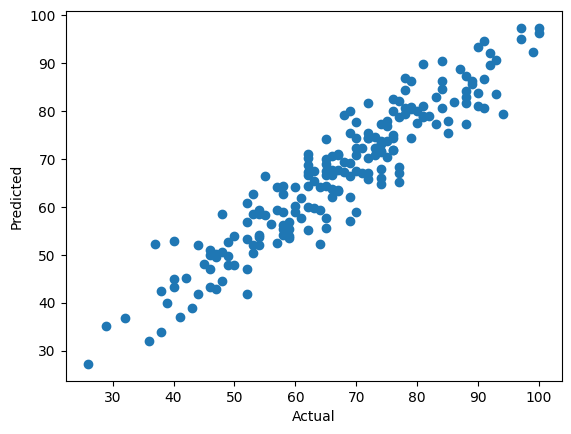

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot:xlabel='math_score'>

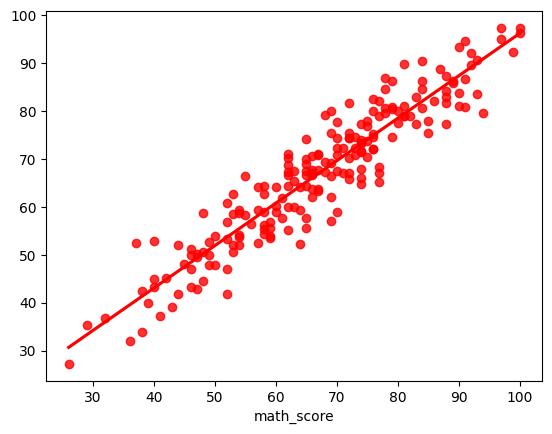

In [15]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

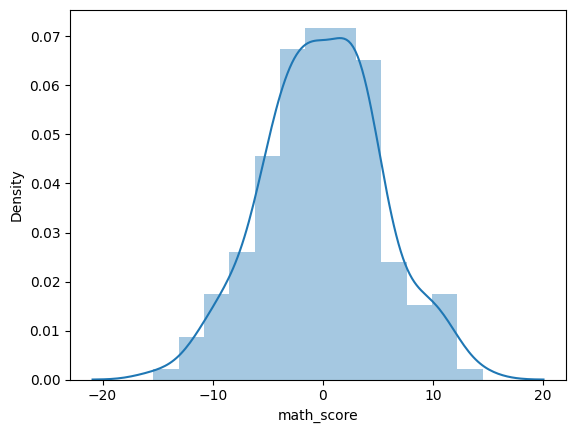

In [19]:
sns.distplot(y_test-y_pred)


## Difference between Actual and Predicted values

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference value':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference value
258,70,70.750,-0.750
511,64,52.250,11.750
593,74,71.500,2.500
317,83,82.875,0.125
643,74,73.375,0.625
...,...,...,...
804,73,70.875,2.125
979,91,86.750,4.250
0,72,65.750,6.250
947,49,49.875,-0.875
